In [1]:
import seaborn as sns
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
file_dir = '/home/amber/colab_hani/correlation_compare/res_64.h5'

In [3]:
def plot_true_vs_pred(index,cell_line,file):
    f = h5py.File(file,'r')
    true = f['true'][index,:,cell_line]
    pred = f['pred'][index,:,cell_line]
    
    sns.lineplot(x = range(len(true)),y = true)
    sns.lineplot(x = range(len(true)),y = pred)
    

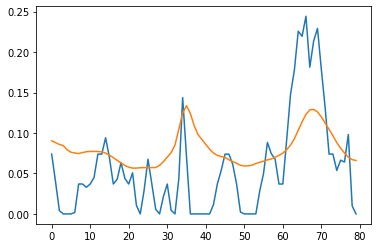

In [4]:
plot_true_vs_pred(7992,0,file_dir)

In [ ]:
plot_true_vs_pred(7992,0,file_dir)